In [71]:
#Load the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import warnings
warnings.filterwarnings('ignore')

**Preprocessing**

In [72]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
imdb_data = pd.read_csv('/content/drive/My Drive/NLPAssignments/Project/IMDBDataset.csv')
print(imdb_data.shape)
imdb_data.head(10)

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [74]:
imdb_data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [75]:
imdb_data['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [76]:
nltk.download('stopwords')
tokenizer=ToktokTokenizer()
stopword_list=nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [78]:
imdb_data.iloc[2].review

'I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I\'d laughed at one of Woody\'s comedies in years (dare I say a decade?). While I\'ve never been impressed with Scarlet Johanson, in this she managed to tone down her "sexy" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than "Devil Wears Prada" and more interesting than "Superman" a great comedy to go see with friends.'

In [79]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

imdb_data['review']=imdb_data['review'].apply(strip_html)

In [80]:
imdb_data.iloc[2].review

'I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.This was the most I\'d laughed at one of Woody\'s comedies in years (dare I say a decade?). While I\'ve never been impressed with Scarlet Johanson, in this she managed to tone down her "sexy" image and jumped right into a average, but spirited young woman.This may not be the crown jewel of his career, but it was wittier than "Devil Wears Prada" and more interesting than "Superman" a great comedy to go see with friends.'

In [81]:
imdb_data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [82]:
def remove_special_characters(text):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
imdb_data['review']=imdb_data['review'].apply(remove_special_characters)

In [83]:
imdb_data.iloc[2].review

'I thought this was a wonderful way to spend time on a too hot summer weekend sitting in the air conditioned theater and watching a lighthearted comedy The plot is simplistic but the dialogue is witty and the characters are likable even the well bread suspected serial killer While some may be disappointed when they realize this is not Match Point 2 Risk Addiction I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to loveThis was the most Id laughed at one of Woodys comedies in years dare I say a decade While Ive never been impressed with Scarlet Johanson in this she managed to tone down her sexy image and jumped right into a average but spirited young womanThis may not be the crown jewel of his career but it was wittier than Devil Wears Prada and more interesting than Superman a great comedy to go see with friends'

In [84]:
imdb_data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production The filming tech...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically theres a family where a little boy J...,negative
4,Petter Matteis Love in the Time of Money is a ...,positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,Bad plot bad dialogue bad acting idiotic direc...,negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,Im going to have to disagree with the previous...,negative


In [85]:
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
imdb_data['review']=imdb_data['review'].apply(remove_stopwords)

In [86]:
imdb_data.iloc[2].review

'thought wonderful way spend time hot summer weekend sitting air conditioned theater watching lighthearted comedy plot simplistic dialogue witty characters likable even well bread suspected serial killer may disappointed realize Match Point 2 Risk Addiction thought proof Woody Allen still fully control style many us grown loveThis Id laughed one Woodys comedies years dare say decade Ive never impressed Scarlet Johanson managed tone sexy image jumped right average spirited young womanThis may crown jewel career wittier Devil Wears Prada interesting Superman great comedy go see friends'

In [87]:
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
imdb_data['review']=imdb_data['review'].apply(simple_stemmer)

In [88]:
imdb_data.iloc[2].review

'thought wonder way spend time hot summer weekend sit air condit theater watch lightheart comedi plot simplist dialogu witti charact likabl even well bread suspect serial killer may disappoint realiz match point 2 risk addict thought proof woodi allen still fulli control style mani us grown lovethi Id laugh one woodi comedi year dare say decad ive never impress scarlet johanson manag tone sexi imag jump right averag spirit young womanthi may crown jewel career wittier devil wear prada interest superman great comedi go see friend'

In [89]:
imdb_data

,review,sentiment
0,one review mention watch 1 Oz episod youll hoo...,positive
1,wonder littl product film techniqu unassum old...,positive
2,thought wonder way spend time hot summer weeke...,positive
3,basic there famili littl boy jake think there ...,negative
4,petter mattei love time money visual stun film...,positive
...,...,...
49995,thought movi right good job wasnt creativ orig...,positive
49996,bad plot bad dialogu bad act idiot direct anno...,negative
49997,cathol taught parochi elementari school nun ta...,negative
49998,Im go disagre previou comment side maltin one ...,negative


In [90]:
X= imdb_data['review']
y = imdb_data['sentiment']

y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

**Generative** **model**

In [92]:
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
cv_train_reviews=cv.fit_transform(X_train)
cv_test_reviews=cv.transform(X_test)

print(cv_train_reviews[0].shape)
print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)

(1, 6134578)
BOW_cv_train: (40000, 6134578)
BOW_cv_test: (10000, 6134578)


In [93]:
mnb=MultinomialNB()
mnb_bow=mnb.fit(cv_train_reviews,y_train)

In [94]:
mnb_bow_predict=mnb_bow.predict(cv_test_reviews)

In [95]:
mnb_bow_score=accuracy_score(y_test,mnb_bow_predict)
print("mnb_bow_score :",mnb_bow_score)

mnb_bow_score : 0.7397


In [96]:
mnb_bow_report=classification_report(y_test,mnb_bow_predict,target_names=['Negative','Positive'])
print(mnb_bow_report)

              precision    recall  f1-score   support

    Negative       0.73      0.76      0.74      4961
    Positive       0.75      0.72      0.74      5039

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.74      0.74      0.74     10000



In [97]:
cm_bow=confusion_matrix(y_test,mnb_bow_predict)
print(cm_bow)

[[3775 1186]
 [1417 3622]]


**Generate** **Data**

In [ ]:
neg_class_prob_sorted = mnb_bow.feature_log_prob_[0, :].argsort()
pos_class_prob_sorted = mnb_bow.feature_log_prob_[1, :].argsort()

In [ ]:
print(np.take(cv.get_feature_names(), neg_class_prob_sorted[-30:]))
print(np.take(cv.get_feature_names(), pos_class_prob_sorted[-30:]))

['dame angela' 'dr flanner' 'gaglia' 'latifa' 'chise' 'harrer' 'numar'
 'ranger jake' 'clich number' 'fatal furi' 'ndour' 'ra ha' 'ra ha tet'
 'mr rd' 'hayakawa' 'frewer' 'weedon' 'ilia' 'salena' 'tmtm' 'adonijah'
 'ha tet' 'tet' 'kazaf' 'worn boot' 'rosario charact' 'spilsburi'
 'trivialbor trivialbor trivialbor' 'trivialbor trivialbor' 'trivialbor']
['bought case cognaci' 'cognaci' 'keitaro' 'yuksu' 'hanka' 'tetsur'
 'listen istanbul intent' 'listen istanbul' 'rf' 'istanbul intent eye'
 'istanbul intent' 'tucso' 'intent eye' 'went bought case' 'iek'
 'skater 2x' 'pro skater 2x' 'montero' 'toni hawk pro' 'hawk pro skater'
 'hawk pro' 'mad full stopoz' 'full stopoz greatest' 'full stopoz'
 'stopoz greatest show' 'stopoz' 'stopoz greatest' 'ever mad full'
 'show ever mad' 'mad full']


In [ ]:
def gen_words(cond_dist, sentiment, vocab):
    num_words= 30
    word_list=[]
 
    for i in range(num_words):
        word= np.random.choice(vocab,p = cond_dist[sentiment])
        print(word)
        word_list.append(word)
    return ' '.join(word_list)

In [ ]:
vocab= cv.get_feature_names()
cond_prob= np.exp(mnb_bow.feature_log_prob_)
review_list=[]
sentiment_list=[]

In [ ]:
for i in range(100):
  if (i<50):
    review_list.append(gen_words(cond_prob, 1, vocab))
    sentiment_list.append(1)
  else:
    review_list.append(gen_words(cond_prob, 0, vocab))
    sentiment_list.append(0)

In [ ]:
generated_df = pd.DataFrame(
    {'review': review_list,
     'sentiment': sentiment_list
    })
generated_df.to_csv('/content/drive/My Drive/NLPAssignments/Project/generated_data.csv',index=False)

**Using model trained on real data on test data**

In [98]:
imdb_data1 = pd.read_csv('/content/drive/My Drive/NLPAssignments/Project/generated_data.csv')
X_test_gen= imdb_data1['review']
y_test_gen = imdb_data1['sentiment']
cv_test_reviews=cv.transform(X_test_gen)
mnb_bow_predict=mnb_bow.predict(cv_test_reviews)

In [99]:
mnb_bow_score=accuracy_score(y_test_gen,mnb_bow_predict)
print("mnb_bow_score :",mnb_bow_score)

mnb_bow_score : 0.949


In [100]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(y_test_gen,mnb_bow_predict)
print(cm_bow)

[[471  29]
 [ 22 478]]


**Discriminative** **LSTM**

In [114]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from numpy import zeros

In [102]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [103]:
vocab_size = len(tokenizer.word_index) + 1

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [104]:
embeddings_dictionary = dict()
glove_file = open('/content/drive/My Drive/NLPAssignments/Project/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [105]:
embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [106]:
model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)
model.add(LSTM(128))

model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [107]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          15596900  
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 15,714,277
Trainable params: 117,377
Non-trainable params: 15,596,900
_________________________________________________________________
None


In [108]:
history = model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)
score = model.evaluate(X_test, y_test, verbose=1)

Epoch 1/6
250/250 [==============================] - 82s 327ms/step - loss: 0.5611 - acc: 0.7149 - val_loss: 0.5356 - val_acc: 0.7681
Epoch 2/6
250/250 [==============================] - 77s 308ms/step - loss: 0.4983 - acc: 0.7725 - val_loss: 0.4533 - val_acc: 0.7970
Epoch 3/6
250/250 [==============================] - 77s 308ms/step - loss: 0.4412 - acc: 0.7990 - val_loss: 0.4251 - val_acc: 0.8134
Epoch 4/6
250/250 [==============================] - 78s 312ms/step - loss: 0.4110 - acc: 0.8197 - val_loss: 0.3960 - val_acc: 0.8175
Epoch 5/6
250/250 [==============================] - 79s 316ms/step - loss: 0.3746 - acc: 0.8361 - val_loss: 0.3770 - val_acc: 0.8357
Epoch 6/6
313/313 [==============================] - 10s 31ms/step - loss: 0.3676 - acc: 0.8334


In [109]:
y_pred = model.predict(X_test)

In [110]:
f = lambda x: 0 if x<0.5 else 1
y_pred = list(map(f, y_pred))

In [111]:
abc = classification_report(y_test, y_pred, target_names=['Negative','Positive'])
print(abc)

              precision    recall  f1-score   support

    Negative       0.80      0.88      0.84      4961
    Positive       0.87      0.78      0.83      5039

    accuracy                           0.83     10000
   macro avg       0.84      0.83      0.83     10000
weighted avg       0.84      0.83      0.83     10000



In [112]:
confusion_matrix(y_test, y_pred)

array([[4380,  581],
       [1085, 3954]])

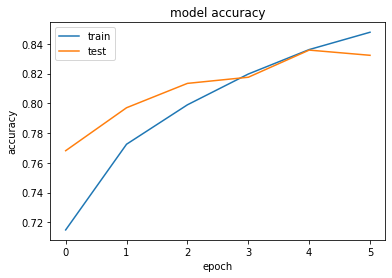

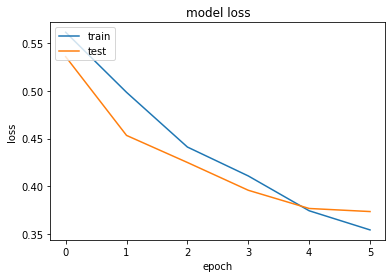

In [113]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

**Model performance on synthetic data**

In [115]:
X_test_gen = tokenizer.texts_to_sequences(X_test_gen)
X_test_gen = pad_sequences(X_test_gen, padding='post', maxlen=maxlen)
model.evaluate(X_test_gen, y_test_gen, verbose=1)

32/32 [==============================] - 1s 29ms/step - loss: 0.8614 - acc: 0.5710


[0.8613764643669128, 0.5709999799728394]

In [116]:
y_pred_gen = model.predict(X_test_gen)
y_pred_gen = list(map(f, y_pred_gen))
abc = classification_report(y_test_gen, y_pred_gen, target_names=['Negative','Positive'])
print(abc)

              precision    recall  f1-score   support

    Negative       0.55      0.80      0.65       500
    Positive       0.63      0.34      0.44       500

    accuracy                           0.57      1000
   macro avg       0.59      0.57      0.55      1000
weighted avg       0.59      0.57      0.55      1000



In [117]:
confusion_matrix(y_test_gen, y_pred_gen)

array([[400, 100],
       [329, 171]])